# Сортировки и поиски 
### Татур Стефан Андреевич НММбд-02-22

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Реализация сортировки пузырьком:

In [7]:
def bubble_sort(arg):
    for i in range(len(arg)):
        for j in range(len(arg)-i-1):
            if arg[j] > arg[j+1]:
                arg[j], arg[j+1] = arg[j+1], arg[j]
    return arg

### Задача 1

Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 5. 

In [5]:
def LinearSearch(nums, val):
    for i in range(len(nums)):
        if nums[i] == val:
            return i
    return -1

def BinarySearch(nums, val):
    first = 0
    last = len(nums)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if nums[mid] == val:
            index = mid
        else:
            if val<nums[mid]:
                last = mid -1
            else:
                first = mid +1
    return index

def JumpSearch(nums, val):
    length = len(nums)
    jump = int(length**0.5)
    left, right = 0, 0
    while left < length and nums[left] <= val:
        right = min(length - 1, left + jump)
        if nums[left] <= val and nums[right] >= val:
            break
        left += jump;
    if left >= length or nums[left] > val:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and nums[i] <= val:
        if nums[i] == val:
            return i
        i += 1
    return -1

def ExponentialSearch(nums, val):
    if nums[0] == val:
        return 0
    index = 1
    while index < len(nums) and nums[index] <= val:
        prev_index = index
        index = index * 2
    return BinarySearch(nums[:min(index, len(nums))], val)

def InterpolationSearch(nums, val):
    low = 0
    high = (len(nums) - 1)
    while low <= high and val >= nums[low] and val <= nums[high]:
        index = low + int(((float(high - low) / ( nums[high] - nums[low])) * ( val - nums[low])))
        if nums[index] == val:
            return index
        if nums[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1

In [8]:
import random as rd

numbers = np.random.randint(1,1000,100)
numbers = bubble_sort(numbers)
search = numbers[5]

search

60

In [74]:
%%timeit

LinearSearch(numbers, search)

1.76 µs ± 24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [75]:
%%timeit 

BinarySearch(numbers, search)

3.21 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [76]:
%%timeit 

JumpSearch(numbers, search)

5.96 µs ± 88.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [77]:
%%timeit

ExponentialSearch(numbers, search)

4.73 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [78]:
%%timeit

InterpolationSearch(numbers, search)

9.41 µs ± 674 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


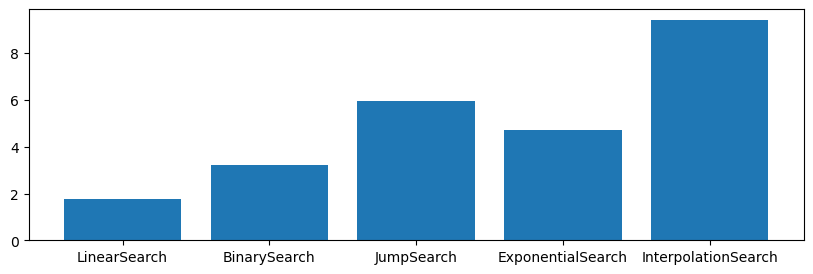

In [3]:
searchs = ['LinearSearch','BinarySearch','JumpSearch','ExponentialSearch','InterpolationSearch']
times = [1.76,3.21,5.96,4.73,9.41]
plt.figure(figsize=(10,3))
plt.bar(searchs,times)
plt.show()

При нахождении искомого элемента в начале,наилучший результат дает **Линейный поиск**.

### Задача 2
Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 95.

In [10]:
search = numbers[95]
search

956

In [11]:
%%timeit

LinearSearch(numbers, search)

21.1 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit 

BinarySearch(numbers, search)

5.53 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%%timeit 

JumpSearch(numbers, search)

16.7 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
%%timeit

ExponentialSearch(numbers, search)

10.1 µs ± 958 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
%%timeit

InterpolationSearch(numbers, search)

10.2 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


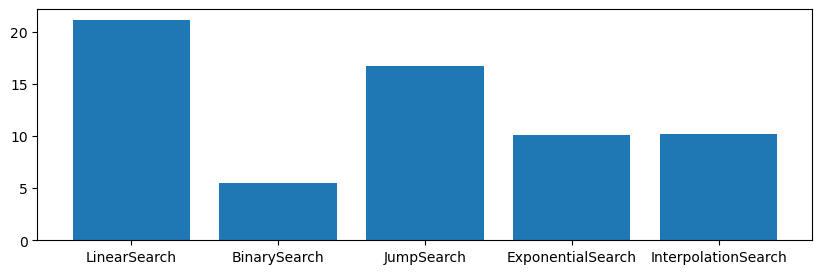

In [17]:
times_2 = [21.1,5.53,16.7,10.1,10.2]
plt.figure(figsize=(10,3))
plt.bar(searchs, times_2)
plt.show()

Как видим из полученных результатов,при расположении искомого элемента в конце,наилучший результат дает **Бинарный поиск**. **Линейный поиск** показал наихудший результат.

### Задача 3
Сделайте выводы по скорости работы алгоритмов поиска в разных условиях из 1 и 2 задач. Постройте 2 графика сравнения этих скоростей.

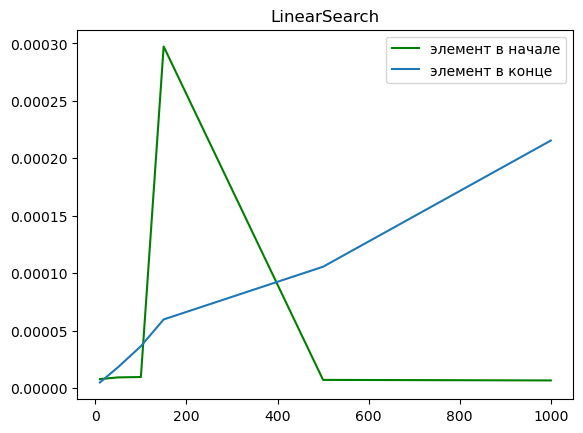

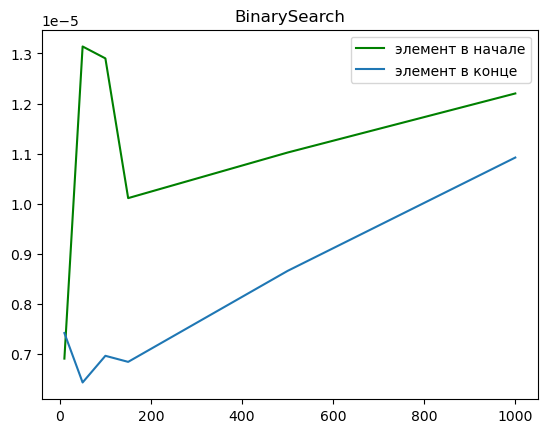

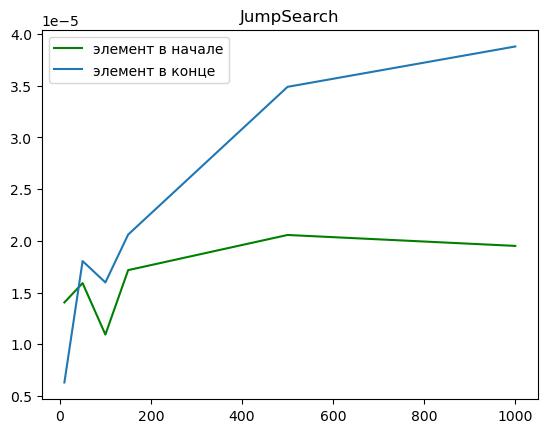

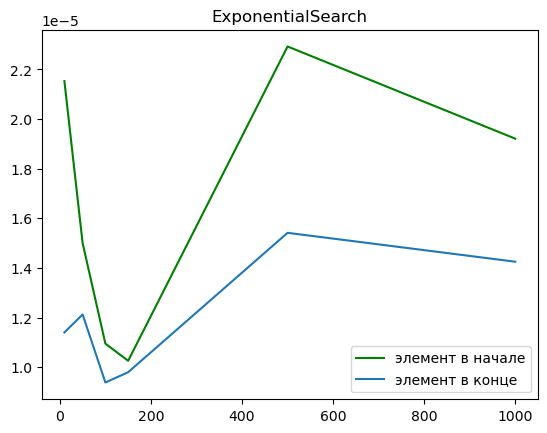

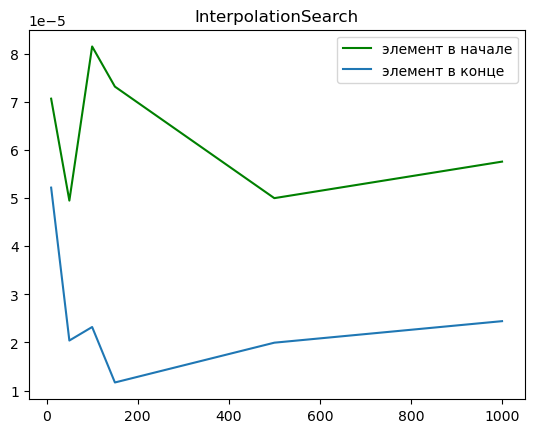

In [27]:
import time 

t = [10,50,100,150,500,1000]
times_1 = []
times_2=[]
names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for i in t:
        nums = np.random.randint(1,1000,i)
        nums = bubble_sort(nums)
    
        start_time = time.perf_counter()
        search(nums, nums[7]) 
        end_time = time.perf_counter()  
        times_1.append(end_time - start_time)
    
        start_time = time.perf_counter()
        search(nums, nums[-7]) 
        end_time = time.perf_counter()
        
        times_2.append(end_time - start_time)
    plt.plot(t, times_1,color='green' )
    plt.plot(t, times_2)
    plt.title(names[s_num])
    plt.legend(['элемент в начале', 'элемент в конце'])
    
    plt.show()
    times_1 = []
    times_2 = []

Експоненциальный поиск имеет средний результат при расположении элемента как в конце так и в начале. Линейный поиск по-прежнему хорошо справляется с поиском элемента в конце. Также очень быстро с элементом в конце справяляется интерполяционный поиск.

### Задача 4
Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны быть последовательными от 1 до 100). 

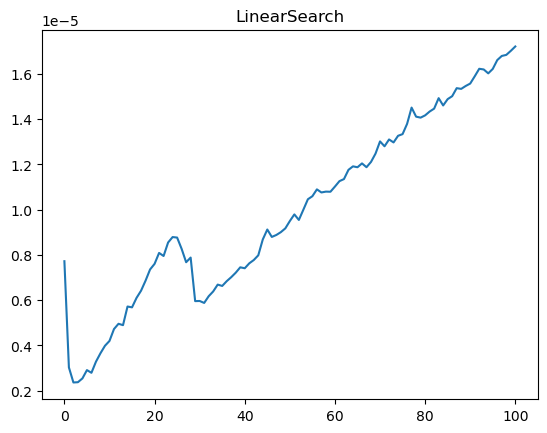

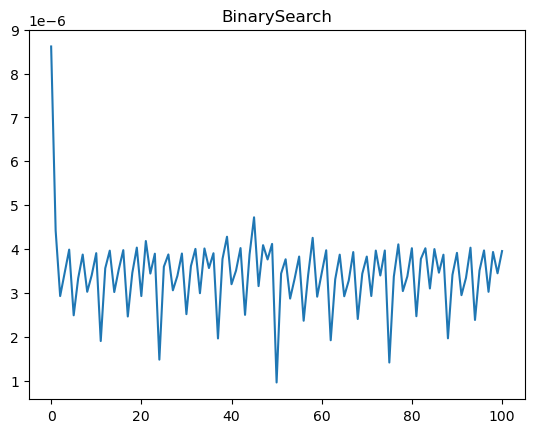

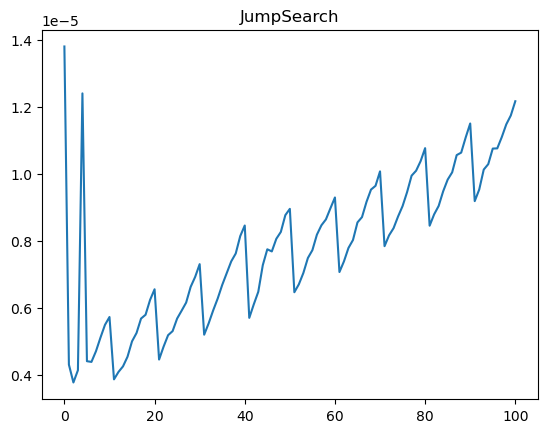

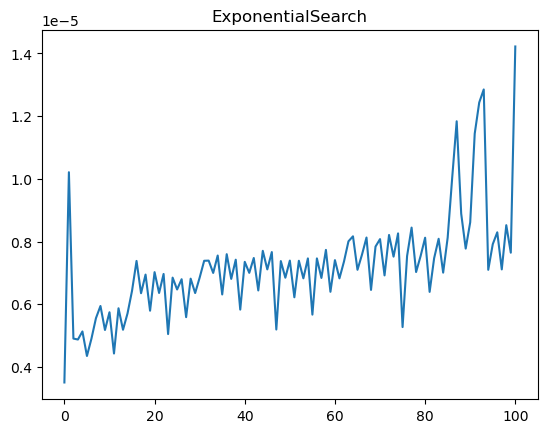

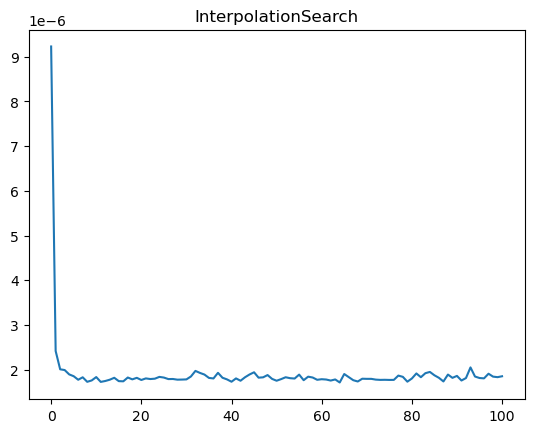

In [24]:
nums = range(101)
times = []
names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for r in nums:
        start_time = time.perf_counter()
        search(nums, r)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    plt.plot(times)
    plt.title(names[s_num])
    plt.show()
    times = []

### Задача 5

Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны иметь обратную последовательность от 100 до 1).

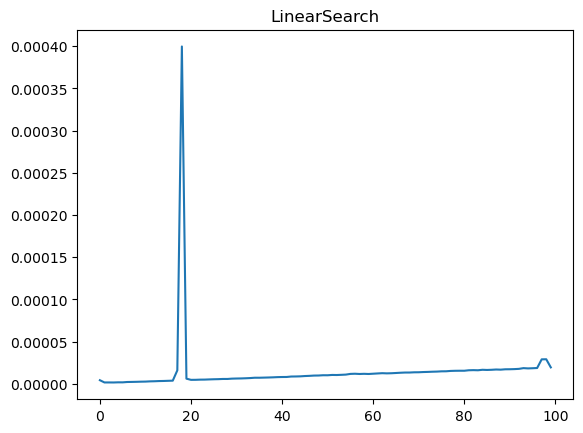

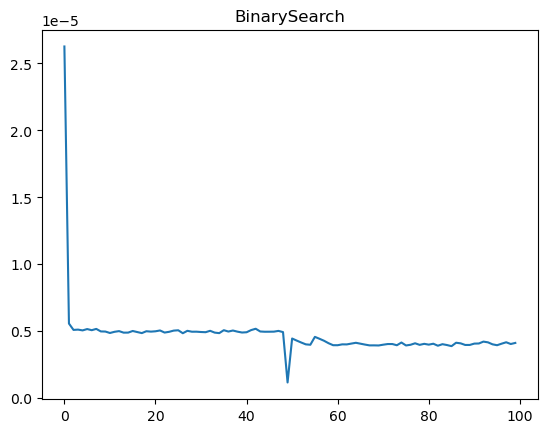

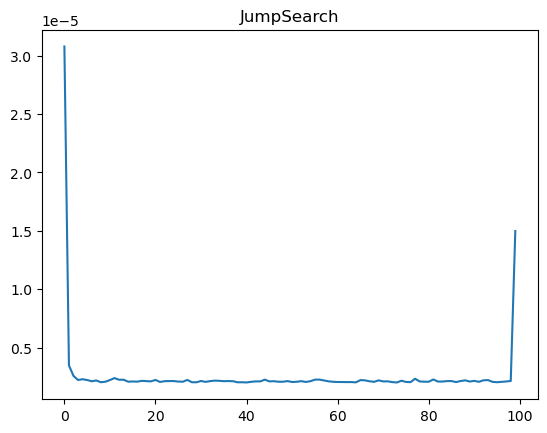

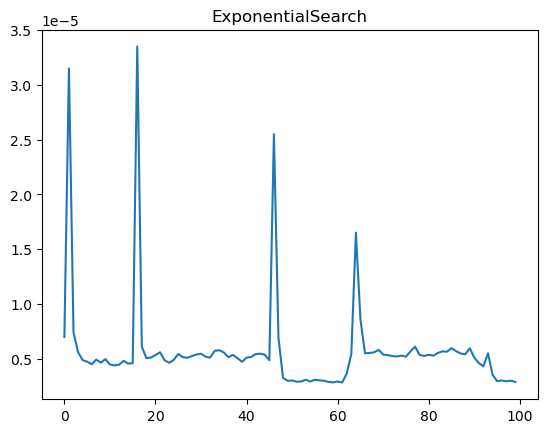

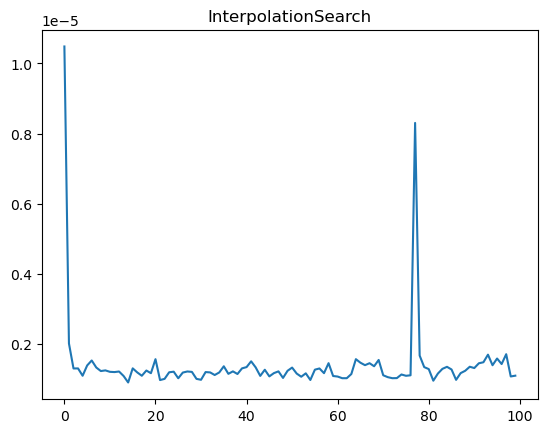

In [25]:
nums = range(100, 0, -1)
times = []
names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for r in nums:
        start_time = time.perf_counter()
        search(nums, r)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    plt.plot(times)
    plt.title(names[s_num])
    plt.show()
    times = []